In [15]:
# Regressão Linear Simples

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

ARQ = '../data/raw/cars.csv'

df = pd.read_csv(ARQ)
df.shape

(50, 3)

In [16]:
df.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [17]:
df.describe()

,Unnamed: 0,speed,dist
count,50.00000,50.000000,50.000000
mean,25.50000,15.400000,42.980000
std,14.57738,5.287644,25.769377
min,1.00000,4.000000,2.000000
25%,13.25000,12.000000,26.000000
50%,25.50000,15.000000,36.000000
75%,37.75000,19.000000,56.000000
max,50.00000,25.000000,120.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  50 non-null     int64
 1   speed       50 non-null     int64
 2   dist        50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [19]:
df = df.drop(columns=['Unnamed: 0'])

In [21]:
# Definições das variáveis X e Y, X distância é a variavel independente e Y velocidade é a variável dependente
X = df.iloc[:, 1].values
Y = df.iloc[:, 0].values
X

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [22]:
# Cálculo da correlação entre X e Y
correlacao = np.corrcoef(X, Y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [23]:
#  Formatação da variável X para o formato esperado pelo modelo do scikit-learn
X = X.reshape(-1, 1)

# Criação do modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Visualização dos coeficientes
# Onde a linha de melhor ajuste é dada por: Y = aX + b
# Sendo 'a' a inclinação da reta e 'b' o intercepto
modelo.intercept_

np.float64(8.283905641787172)

In [ ]:
# Inclinação da reta
modelo.coef_

array([0.16556757])

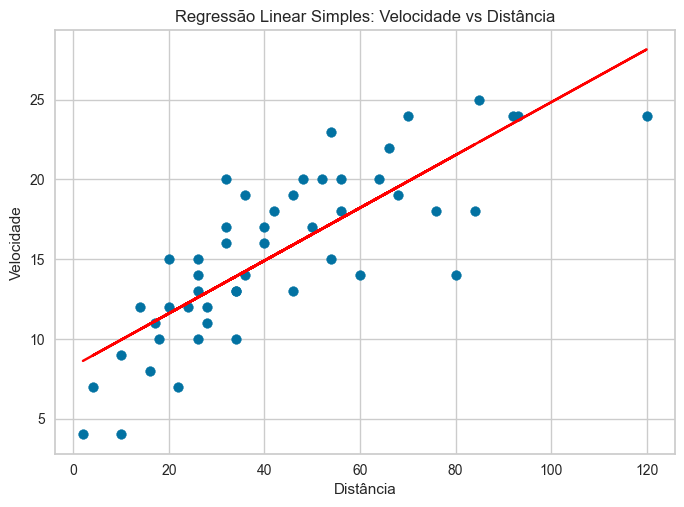

In [26]:
# Gerando o gráfico de dispersão com a linha de regressão
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color='red')
plt.xlabel('Distância')
plt.ylabel('Velocidade')
plt.title('Regressão Linear Simples: Velocidade vs Distância')
plt.show()

In [ ]:
# Previsão da distância 22 pés usando fórmula manual
# Qual velocidade se levou 22 pés para parar?
modelo.intercept_ + modelo.coef_ * 22 

array([11.92639228])

In [28]:
modelo.predict([[22]])

array([11.92639228])

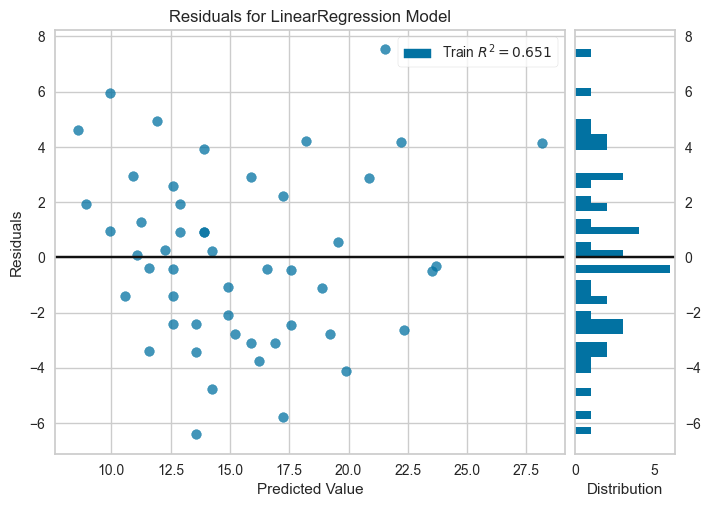

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, Y)
visualizador.poof()

In [ ]:
# Ao analizar os resíduos, podemos ter certeza se regressão linear é um modelo adequado para os dados.
# Se os resíduos estiverem distribuídos aleatoriamente em torno de zero e o histograma à direita lembrar uma distribuição normal, isso indica que o modelo é apropriado.

In [2]:
# Regressão Linear Múltipla

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

ARQ = '../data/raw/mt_cars.csv'

df2 = pd.read_csv(ARQ)
df2.shape

(32, 12)

In [3]:
df2.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [5]:
X = df2.iloc[:, 2].values  # Coluna disp = cilindradas
Y = df2.iloc[:, 0].values  # Coluna mpg = milhas por galão

correlacao = np.corrcoef(X, Y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [6]:
# Formatação da variável X para o formato esperado pelo modelo do scikit-learn
X = X.reshape(-1, 1)

In [7]:
# Criação do modelo, treinamento e visualização dos coeficientes
modelo = LinearRegression()
modelo.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
modelo.intercept_

np.float64(29.59985475616395)

In [9]:
modelo.coef_

array([-0.04121512])

In [10]:
modelo.score(X, Y)  # R², mostra o quanto o modelo consegue explicar a variação dos dados em porcentagem

0.7183433404897299

In [11]:
previsoes = modelo.predict(X)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [13]:
# Criação do modelo, utilizando a biblioteca statsmodel
# podemos ver r ajustando r2
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = df2)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           9.38e-10
Time:                        20:14:13   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

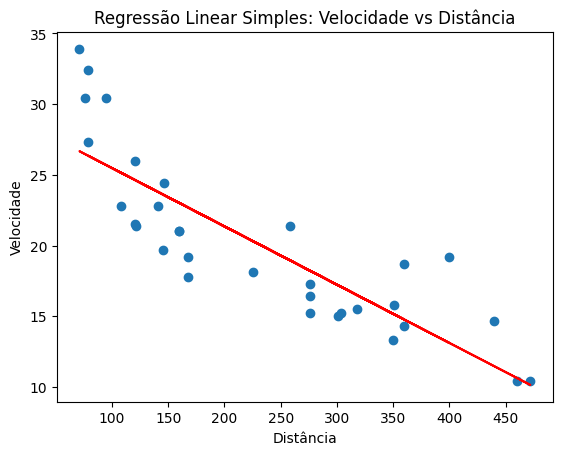

In [ ]:
plt.scatter(X, Y)
plt.plot(X, previsoes, color = 'red')
plt.show()

In [15]:
# Previsão para somente um valor
modelo.predict([[200]])

array([21.35683076])

In [16]:
X1 = df2.iloc[:, 1:4].values
X1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [17]:
Y1 = df2.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(X1, Y1)
modelo2.score(X1, Y1)

0.7678877440928638

In [23]:
novo = np.array([4, 200, 100])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([24.03968887])

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ARQ = '../data/raw/slr12.csv'

df3 = pd.read_csv(ARQ, sep = ';')
df3.shape

(36, 2)

In [47]:
df3.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [48]:
X = df3.iloc[:, 0].values
Y = df3.iloc[:, 1].values
X

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850])

In [49]:
correlacao = np.corrcoef(X, Y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [50]:
X = X.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


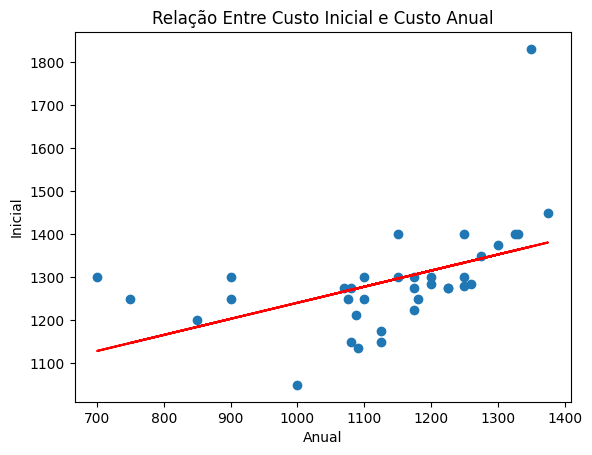

In [52]:
plt.scatter(X, Y)
plt.plot(X, modelo.predict(X), color = 'red')
plt.xlabel('Anual')
plt.ylabel('Inicial')
plt.title('Relação Entre Custo Inicial e Custo Anual')
plt.show()

In [53]:
modelo.score(X, Y)

0.2275359181555101

In [63]:
modelo.predict([[1300]]) 

array([1352.70953897])